In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textwrap import wrap


rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')


In [2]:
raw_data = pd.read_csv('speedup_1024l2.csv')
raw_data

,Benchmark,Baseline,LBPU,LTCU,Valkyrie,Prefetcher,Probing,Valkyrie.1
0,mt,0.010440,0.007600,0.008890,0.007070,1.373684,1.174353,1.476662
1,mm,0.135700,0.107900,0.086300,0.080100,1.257646,1.572422,1.694132
2,km,0.077420,0.070900,0.034500,0.035800,1.091961,2.244058,2.162570
3,st,0.037500,0.035400,0.030270,0.029500,1.059322,1.238850,1.271186
4,pr,0.067500,0.062400,0.043400,0.041100,1.081731,1.555300,1.642336
5,spmv,0.080600,0.028500,0.046830,0.026300,2.828070,1.721119,3.064639
6,flw,0.059800,0.052900,0.038900,0.030900,1.130435,1.537275,1.935275
7,fir,0.004940,0.004940,0.004940,0.004940,1.000000,1.000000,1.000000
8,bs,0.076300,0.076300,0.076300,0.076300,1.000000,1.000000,1.000000
9,sc,0.000839,0.000839,0.000839,0.000839,1.000000,1.000000,1.000000


In [3]:
stacked_data = raw_data
stacked_data['LBPU'] = stacked_data['Baseline']/stacked_data['LBPU']
stacked_data['LTCU'] = stacked_data['Baseline']/stacked_data['LTCU']
stacked_data['Valkyrie'] = stacked_data['Baseline']/stacked_data['Valkyrie']
stacked_data['Baseline'] = stacked_data['Baseline']/stacked_data['Baseline']


stacked_data = stacked_data.melt(id_vars=['Benchmark'], value_vars=['Baseline', 'LBPU','LTCU','Valkyrie'])
stacked_data['Benchmark'] = stacked_data['Benchmark'].str.upper()
#stacked_data = stacked_data.sort_values(['Benchmark'])
stacked_data.columns = ['Benchmark', 'Configuration', 'Speedup']

stacked_data


,Benchmark,Configuration,Speedup
0,MT,Baseline,1.000000
1,MM,Baseline,1.000000
2,KM,Baseline,1.000000
3,ST,Baseline,1.000000
4,PR,Baseline,1.000000
5,SPMV,Baseline,1.000000
6,FLW,Baseline,1.000000
7,FIR,Baseline,1.000000
8,BS,Baseline,1.000000
9,SC,Baseline,1.000000


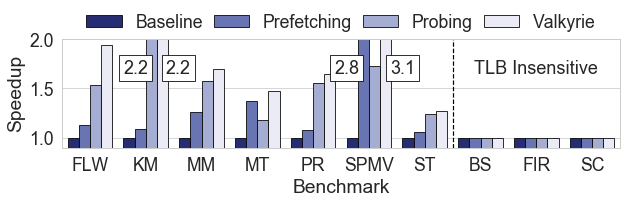

In [4]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=stacked_data, 
            x='Benchmark', hue='Configuration', y='Speedup', 
            order=["FLW", "KM", "MM", "MT", "PR", "SPMV", "ST", "BS", "FIR", "SC"], 
            palette=['#1A237E','#5C6BC0','#9FA8DA', '#E8EAF6' ], ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
labels=["Baseline", "Prefetching", "Probing", "Valkyrie"]
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.15), loc=10, ncol=4)
ax.set_ylim(0.9, 2.0)
ax.set_yticks([1.0, 1.5, 2.0])


ax.text(0.82, 1.7, 2.2,  horizontalalignment='center', verticalalignment='center',
        fontsize=18, bbox=dict(facecolor='white', ec='k'))
ax.text(1.58, 1.7, 2.2,  horizontalalignment='center', verticalalignment='center',
        fontsize=18, bbox=dict(facecolor='white', ec='k'))
ax.text(4.6, 1.7, 2.8,  horizontalalignment='center', verticalalignment='center',
        fontsize=18, bbox=dict(facecolor='white', ec='k'))
ax.text(5.6, 1.7, 3.1,  horizontalalignment='center', verticalalignment='center',
        fontsize=18, bbox=dict(facecolor='white', ec='k'))

ax.axvline(6.5, 0, 1, c='k', ls='--')
ax.text(8, 1.7, 'TLB Insensitive',  horizontalalignment='center', verticalalignment='center',
        fontsize=18)

plt.savefig('speedup_1024l2.pdf', bbox_inches='tight')
plt.savefig('speedup_1024l2.png', dpi=600, bbox_inches='tight')
plt.show()
plt.close()